In [98]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import scorecardpy as sc
import pprint

In [99]:
df_main = pd.read_csv('filtered_data_iter2.csv')
df = df_main.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114755 entries, 0 to 114754
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                114755 non-null  int64  
 1   STATUS                    114755 non-null  int64  
 2   NAME_CONTRACT_TYPE        114755 non-null  object 
 3   FLAG_OWN_CAR              114755 non-null  object 
 4   FLAG_OWN_REALTY           114755 non-null  object 
 5   AMT_INCOME_TOTAL          114755 non-null  float64
 6   AMT_CREDIT                114755 non-null  float64
 7   AMT_ANNUITY               114755 non-null  float64
 8   NAME_INCOME_TYPE          114755 non-null  object 
 9   NAME_EDUCATION_TYPE       114755 non-null  object 
 10  NAME_FAMILY_STATUS        114755 non-null  object 
 11  NAME_HOUSING_TYPE         114755 non-null  object 
 12  DAYS_EMPLOYED             114755 non-null  int64  
 13  OCCUPATION_TYPE           114755 non-null  o

In [100]:
#replace value 0 in status with 2
# df["STATUS"].replace(0,2,inplace=True)
# df["STATUS"].replace(1,0,inplace=True)
# df["STATUS"].replace(2,1,inplace=True)
df["STATUS"].value_counts()


0    104221
1     10534
Name: STATUS, dtype: int64

In [101]:
df.dropna(inplace=True)
df.isnull().sum()

Unnamed: 0                  0
STATUS                      0
NAME_CONTRACT_TYPE          0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
AMT_INCOME_TOTAL            0
AMT_CREDIT                  0
AMT_ANNUITY                 0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_EMPLOYED               0
OCCUPATION_TYPE             0
CNT_FAM_MEMBERS             0
EXT_SOURCE_2                0
DEF_60_CNT_SOCIAL_CIRCLE    0
age                         0
total_enquiries_cb          0
credit_income_ratio         0
dtype: int64

In [102]:
data_dict = {}
for col in df.columns:
    data_dict[col] = [str(df[col].dtypes)]
    

In [103]:
df.groupby('NAME_HOUSING_TYPE')['STATUS'].mean().sort_values(ascending=False)

NAME_HOUSING_TYPE
Rented apartment       0.122692
With parents           0.114336
Municipal apartment    0.098296
House / apartment      0.089223
Co-op apartment        0.081395
Office apartment       0.071726
Name: STATUS, dtype: float64

In [104]:
df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].map({'Low-skill Laborers': 1, 'Cooking staff': 2, 'Cleaning staff': 3, 'Security staff': 4, 'Waiters/barmen staff': 5, 'Laborers': 6, 'Drivers': 7, 'Sales staff': 8, 'Realty agents': 9, 'Secretaries': 10, 'Not Specified': 11, 'Medicine staff': 12, 'Managers': 13, 'High skill tech staff': 14, 'HR staff': 15, 'Core staff': 16, 'Private service staff': 17, 'Accountants': 18, 'IT staff': 19})

# Education labels are in order of increasing education level
df['NAME_EDUCATION_TYPE'] = df['NAME_EDUCATION_TYPE'].map({'Lower secondary': 1, 'Secondary / secondary special': 2, 'Incomplete higher': 3, 'Higher education': 4, 'Academic degree': 5})

# Income labels are in order of increasing income level
df['NAME_INCOME_TYPE'] = df['NAME_INCOME_TYPE'].map({'Student': 1, 'Pensioner': 2, 'Working': 3, 'State servant': 4, 'Commercial associate': 5, 'Businessman': 6})

# Housing labels are in order of increasing loan burden on the individual
df['NAME_HOUSING_TYPE'] = df['NAME_HOUSING_TYPE'].map({'With parents': 1, 'Rented apartment': 2, 'Municipal apartment': 3, 'Office apartment': 4, 'Co-op apartment': 5, 'House / apartment': 6})

In [105]:
df['OCCUPATION_TYPE'].value_counts()

6     25203
11    18883
8     15099
16    13653
13     9875
7      8063
14     5159
18     4800
12     3583
2      2459
4      2157
17     1300
3      1179
1       923
10      651
5       586
9       402
19      310
15      279
Name: OCCUPATION_TYPE, dtype: int64

In [106]:
manual_encodings = ['OCCUPATION_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE', 'NAME_HOUSING_TYPE']

# define the target variable
target = df['STATUS']

# create a list of object columns
object_list = [col for col in df.columns if df[col].dtype == 'object']

# create a dictionary to store the original categorical variables and their encoded values
df_label_encoded = df.copy()
# label encode all object columns and store the original categorical variables and their encoded values
for col in (set(object_list) - set(manual_encodings)):
    print(col)
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# label encode the target variable and add it to the dictionary
le = LabelEncoder()
target = le.fit_transform(target)

NAME_FAMILY_STATUS
NAME_CONTRACT_TYPE
FLAG_OWN_CAR
FLAG_OWN_REALTY


In [107]:
df['NAME_EDUCATION_TYPE'].unique()

array([4, 2, 3, 1, 5], dtype=int64)

In [108]:
df.head()

,Unnamed: 0,STATUS,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,EXT_SOURCE_2,DEF_60_CNT_SOCIAL_CIRCLE,age,total_enquiries_cb,credit_income_ratio
0,0,0,0,1,1,171000.0,1560726.0,41301.0,5,4,1,6,-3130,18,3.0,0.724000,0.0,37.0,4.0,9.127053
1,2,0,0,0,1,112500.0,652500.0,21177.0,3,4,1,6,-679,16,3.0,0.651862,0.0,27.0,1.0,5.800000
2,3,0,0,0,1,67500.0,80865.0,5881.5,3,2,1,6,-2717,6,2.0,0.715042,0.0,36.0,1.0,1.198000
3,4,0,0,1,0,225000.0,918468.0,28966.5,3,2,1,6,-3028,7,3.0,0.566907,0.0,38.0,1.0,4.082080
4,6,0,0,0,0,108000.0,509602.5,26149.5,3,2,1,6,-1317,7,2.0,0.236378,0.0,35.0,1.0,4.718542


In [109]:
df.isna().sum()

Unnamed: 0                  0
STATUS                      0
NAME_CONTRACT_TYPE          0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
AMT_INCOME_TOTAL            0
AMT_CREDIT                  0
AMT_ANNUITY                 0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_EMPLOYED               0
OCCUPATION_TYPE             0
CNT_FAM_MEMBERS             0
EXT_SOURCE_2                0
DEF_60_CNT_SOCIAL_CIRCLE    0
age                         0
total_enquiries_cb          0
credit_income_ratio         0
dtype: int64

In [110]:
del df['Unnamed: 0']
del df['total_enquiries_cb']
del df['NAME_HOUSING_TYPE']
del df['credit_income_ratio']

In [111]:
# automatically calculate bin ranges
# bins = sc.woebin(df, y='STATUS',positive="bad|0")
bins = sc.woebin(df, y='STATUS')
# make it easy to read the bins
for variables , bindetails in bins.items():
    print(variables , " : ")
    display(bindetails)
    print("--"*50)

[INFO] creating woe binning ...
Binning on 114564 rows and 16 columns in 00:00:11
CNT_FAM_MEMBERS  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,CNT_FAM_MEMBERS,"[-inf,2.0)",15571,0.135915,13972,1599,0.102691,0.124801,0.002228,0.005076,2.0,False
1,CNT_FAM_MEMBERS,"[2.0,3.0)",45360,0.395936,41060,4300,0.094797,0.036059,0.000522,0.005076,3.0,False
2,CNT_FAM_MEMBERS,"[3.0,4.0)",32181,0.280900,29398,2783,0.086480,-0.064919,0.001153,0.005076,4.0,False
3,CNT_FAM_MEMBERS,"[4.0,inf)",21452,0.187249,19623,1829,0.085260,-0.080455,0.001173,0.005076,inf,False


----------------------------------------------------------------------------------------------------
AMT_CREDIT  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,AMT_CREDIT,"[-inf,150000.0)",6177,0.053917,5756,421,0.068156,-0.322887,0.004929,0.067077,150000.0,False
1,AMT_CREDIT,"[150000.0,300000.0)",26222,0.228885,23953,2269,0.086530,-0.064276,0.000921,0.067077,300000.0,False
2,AMT_CREDIT,"[300000.0,650000.0)",39699,0.346522,35029,4670,0.117635,0.277461,0.029869,0.067077,650000.0,False
3,AMT_CREDIT,"[650000.0,850000.0)",16348,0.142698,14927,1421,0.086922,-0.059333,0.000490,0.067077,850000.0,False
4,AMT_CREDIT,"[850000.0,1350000.0)",20145,0.175841,18698,1447,0.071829,-0.266446,0.011199,0.067077,1350000.0,False
5,AMT_CREDIT,"[1350000.0,inf)",5973,0.052137,5690,283,0.047380,-0.708541,0.019669,0.067077,inf,False


----------------------------------------------------------------------------------------------------
FLAG_OWN_REALTY  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLAG_OWN_REALTY,"[-inf,1.0)",41009,0.357957,37256,3753,0.091516,-0.002779,0.000003,0.000004,1.0,False
1,FLAG_OWN_REALTY,"[1.0,inf)",73555,0.642043,66797,6758,0.091877,0.001547,0.000002,0.000004,inf,False


----------------------------------------------------------------------------------------------------
AMT_INCOME_TOTAL  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,AMT_INCOME_TOTAL,"[-inf,170000.0)",64065,0.559207,57661,6404,0.099961,0.094820,0.005226,0.021284,170000.0,False
1,AMT_INCOME_TOTAL,"[170000.0,220000.0)",21151,0.184622,19194,1957,0.092525,0.009293,0.000016,0.021284,220000.0,False
2,AMT_INCOME_TOTAL,"[220000.0,340000.0)",23182,0.202350,21409,1773,0.076482,-0.198660,0.007364,0.021284,340000.0,False
3,AMT_INCOME_TOTAL,"[340000.0,inf)",6166,0.053821,5789,377,0.061142,-0.438992,0.008678,0.021284,inf,False


----------------------------------------------------------------------------------------------------
FLAG_OWN_CAR  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLAG_OWN_CAR,"[-inf,1.0)",67448,0.588736,60551,6897,0.102257,0.120079,0.008915,0.023431,1.0,False
1,FLAG_OWN_CAR,"[1.0,inf)",47116,0.411264,43502,3614,0.076704,-0.195514,0.014516,0.023431,inf,False


----------------------------------------------------------------------------------------------------
NAME_CONTRACT_TYPE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,NAME_CONTRACT_TYPE,"[-inf,1.0)",103860,0.906568,93904,9956,0.09586,0.048380,0.002164,0.029617,1.0,False
1,NAME_CONTRACT_TYPE,"[1.0,inf)",10704,0.093432,10149,555,0.05185,-0.613684,0.027453,0.029617,inf,False


----------------------------------------------------------------------------------------------------
OCCUPATION_TYPE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,OCCUPATION_TYPE,"[-inf,5.0)",6718,0.058640,5835,883,0.131438,0.404174,0.011289,0.074947,5.0,False
1,OCCUPATION_TYPE,"[5.0,10.0)",49353,0.430790,43908,5445,0.110328,0.205079,0.019698,0.074947,10.0,False
2,OCCUPATION_TYPE,"[10.0,13.0)",23117,0.201782,21176,1941,0.083964,-0.097187,0.001832,0.074947,13.0,False
3,OCCUPATION_TYPE,"[13.0,inf)",35376,0.308788,33134,2242,0.063376,-0.400714,0.042128,0.074947,inf,False


----------------------------------------------------------------------------------------------------
NAME_FAMILY_STATUS  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,NAME_FAMILY_STATUS,"[-inf,1.0)",12185,0.106360,10877,1308,0.107345,0.174327,0.003470,0.009239,1.0,False
1,NAME_FAMILY_STATUS,"[1.0,2.0)",78550,0.685643,71755,6795,0.086505,-0.064592,0.002786,0.009239,2.0,False
2,NAME_FAMILY_STATUS,"[2.0,3.0)",6580,0.057435,5961,619,0.094073,0.027590,0.000044,0.009239,3.0,False
3,NAME_FAMILY_STATUS,"[3.0,inf)",17249,0.150562,15460,1789,0.103716,0.135879,0.002938,0.009239,inf,False


----------------------------------------------------------------------------------------------------
NAME_EDUCATION_TYPE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,NAME_EDUCATION_TYPE,"[-inf,4.0)",80017,0.698448,71454,8563,0.107015,0.170875,0.021866,0.089046,4.0,False
1,NAME_EDUCATION_TYPE,"[4.0,inf)",34547,0.301552,32599,1948,0.056387,-0.525000,0.067180,0.089046,inf,False


----------------------------------------------------------------------------------------------------
EXT_SOURCE_2  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,EXT_SOURCE_2,"[-inf,0.2)",10302,0.089924,8078,2224,0.215880,1.002641,0.134308,0.301292,0.2,False
1,EXT_SOURCE_2,"[0.2,0.4)",19022,0.166038,16499,2523,0.132636,0.414627,0.033780,0.301292,0.4,False
2,EXT_SOURCE_2,"[0.4,0.6000000000000001)",38352,0.334765,35065,3287,0.085706,-0.074750,0.001814,0.301292,0.6000000000000001,False
3,EXT_SOURCE_2,"[0.6000000000000001,0.7000000000000001)",30621,0.267283,28756,1865,0.060906,-0.443107,0.043835,0.301292,0.7000000000000001,False
4,EXT_SOURCE_2,"[0.7000000000000001,inf)",16267,0.141991,15655,612,0.037622,-0.949335,0.087555,0.301292,inf,False


----------------------------------------------------------------------------------------------------
AMT_ANNUITY  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,AMT_ANNUITY,"[-inf,14000.0)",19409,0.169416,17979,1430,0.073677,-0.239052,8.782527e-03,0.032036,14000.0,False
1,AMT_ANNUITY,"[14000.0,36000.0)",67860,0.592333,60889,6971,0.102726,0.125184,9.769004e-03,0.032036,36000.0,False
2,AMT_ANNUITY,"[36000.0,42000.0)",10646,0.092926,9668,978,0.091865,0.001411,1.851115e-07,0.032036,42000.0,False
3,AMT_ANNUITY,"[42000.0,inf)",16649,0.145325,15517,1132,0.067992,-0.325472,1.348406e-02,0.032036,inf,False


----------------------------------------------------------------------------------------------------
DAYS_EMPLOYED  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,DAYS_EMPLOYED,"[-inf,-4000.0)",14262,0.124489,13453,809,0.056724,-0.518680,0.027139,0.06496,-4000.0,False
1,DAYS_EMPLOYED,"[-4000.0,-1800.0)",36732,0.320624,33952,2780,0.075683,-0.210019,0.012981,0.06496,-1800.0,False
2,DAYS_EMPLOYED,"[-1800.0,-1000.0)",25152,0.219545,22629,2523,0.100310,0.098694,0.002226,0.06496,-1000.0,False
3,DAYS_EMPLOYED,"[-1000.0,inf)",38418,0.335341,34019,4399,0.114504,0.246936,0.022613,0.06496,inf,False


----------------------------------------------------------------------------------------------------
NAME_INCOME_TYPE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,NAME_INCOME_TYPE,"[-inf,4.0)",72291,0.631010,64901,7390,0.102226,0.119743,0.009501,0.030883,4.0,False
1,NAME_INCOME_TYPE,"[4.0,5.0)",10068,0.087881,9430,638,0.063369,-0.400835,0.011996,0.030883,5.0,False
2,NAME_INCOME_TYPE,"[5.0,inf)",32205,0.281109,29722,2483,0.077100,-0.189942,0.009386,0.030883,inf,False


----------------------------------------------------------------------------------------------------
DEF_60_CNT_SOCIAL_CIRCLE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,DEF_60_CNT_SOCIAL_CIRCLE,"[-inf,1.0)",104874,0.915418,95565,9309,0.088764,-0.036347,0.001192,0.012266,1.0,False
1,DEF_60_CNT_SOCIAL_CIRCLE,"[1.0,inf)",9690,0.084582,8488,1202,0.124045,0.337811,0.011074,0.012266,inf,False


----------------------------------------------------------------------------------------------------
age  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,age,"[-inf,32.0)",34162,0.298191,30533,3629,0.106229,0.162627,0.008427,0.01892,32.0,False
1,age,"[32.0,37.0)",34633,0.302303,31382,3251,0.093870,0.025206,0.000194,0.01892,37.0,False
2,age,"[37.0,40.0)",23321,0.203563,21392,1929,0.082715,-0.113537,0.002505,0.01892,40.0,False
3,age,"[40.0,inf)",22448,0.195943,20746,1702,0.075820,-0.208071,0.007793,0.01892,inf,False


----------------------------------------------------------------------------------------------------


In [20]:
#drop credit_income_ratio
df.drop("credit_income_ratio",axis=1,inplace=True)
df.drop("total_enquiries_cb",axis=1,inplace=True)

In [21]:
df.drop("FLAG_OWN_REALTY",axis=1,inplace=True)
df.drop("NAME_HOUSING_TYPE",axis=1,inplace=True)

In [22]:
print(df.shape)
df.head()

(114564, 15)


,STATUS,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,EXT_SOURCE_2,DEF_60_CNT_SOCIAL_CIRCLE,age
0,0,0,1,171000.0,1560726.0,41301.0,5,4,1,-3130,18,3.0,0.724000,0.0,37.0
1,0,0,0,112500.0,652500.0,21177.0,3,4,1,-679,16,3.0,0.651862,0.0,27.0
2,0,0,0,67500.0,80865.0,5881.5,3,2,1,-2717,6,2.0,0.715042,0.0,36.0
3,0,0,1,225000.0,918468.0,28966.5,3,2,1,-3028,7,3.0,0.566907,0.0,38.0
4,0,0,0,108000.0,509602.5,26149.5,3,2,1,-1317,7,2.0,0.236378,0.0,35.0


# Adjust Occupation Type

In [23]:
df["OCCUPATION_TYPE"].value_counts().sort_index()

1       923
2      2459
3      1179
4      2157
5       586
6     25203
7      8063
8     15099
9       402
10      651
11    18883
12     3583
13     9875
14     5159
15      279
16    13653
17     1300
18     4800
19      310
Name: OCCUPATION_TYPE, dtype: int64

[INFO] creating woe binning ...
Binning on 114564 rows and 15 columns in 00:00:11


{'OCCUPATION_TYPE': <Figure size 432x288 with 2 Axes>}

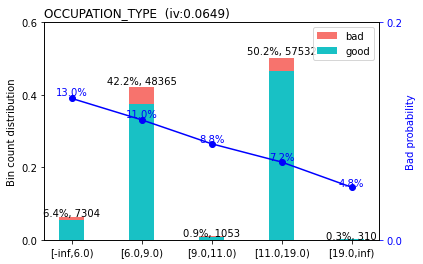

In [32]:
#adjust the bins
breaks_adj = {'OCCUPATION_TYPE' : [1,  6, 9, 11 ,19]}
# bins2 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj, positive="bad|0")
bins2 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj)
sc.woebin_plot(bins2['OCCUPATION_TYPE'])

In [ ]:
#adjust the bins
breaks_adj = {'OCCUPATION_TYPE' : [1,  6, 9, 11 ,19]}
# bins2 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj, positive="bad|0")
bins2 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj)
sc.woebin_plot(bins2['OCCUPATION_TYPE'])

# Adjust name income type

In [141]:
df["NAME_INCOME_TYPE"].value_counts().sort_index()

1        6
2      698
3    71587
4    10068
5    32204
6        1
Name: NAME_INCOME_TYPE, dtype: int64

[INFO] creating woe binning ...
Binning on 114564 rows and 19 columns in 00:00:13


{'NAME_INCOME_TYPE': <Figure size 432x288 with 2 Axes>}

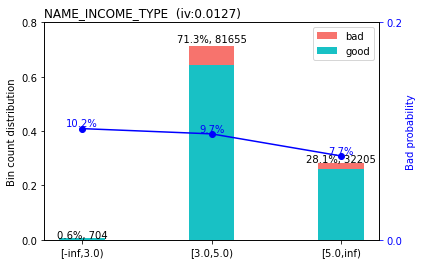

In [77]:
#adjust the bins
breaks_adj = {'NAME_INCOME_TYPE' : [ 3, 5]}
# bins3 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj, positive="bad|0")
bins3 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj)
sc.woebin_plot(bins3['NAME_INCOME_TYPE'])

[INFO] creating woe binning ...
Binning on 114564 rows and 19 columns in 00:00:13


{'NAME_INCOME_TYPE': <Figure size 432x288 with 2 Axes>}

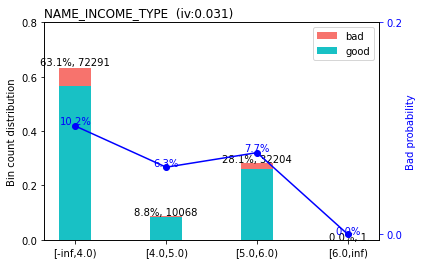

In [75]:
#adjust the bins
breaks_adj = {'NAME_INCOME_TYPE' : [ 4,5,6]}
# bins3 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj, positive="bad|0")
bins3 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj)
sc.woebin_plot(bins3['NAME_INCOME_TYPE'])

# Adjust name education type

In [143]:
df["NAME_EDUCATION_TYPE"].value_counts().sort_index()

1     1184
2    74076
3     4757
4    34483
5       64
Name: NAME_EDUCATION_TYPE, dtype: int64

[INFO] creating woe binning ...
Binning on 114564 rows and 19 columns in 00:00:13


{'NAME_EDUCATION_TYPE': <Figure size 432x288 with 2 Axes>}

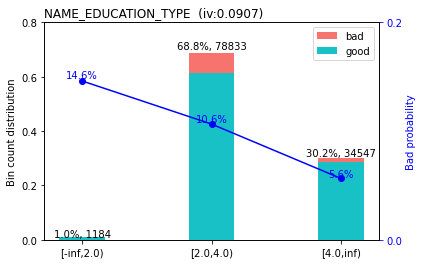

In [72]:
#adjust the bins
breaks_adj = {'NAME_EDUCATION_TYPE' : [1,2,4]}
# bins4 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj, positive="bad|0")
bins4 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj)
sc.woebin_plot(bins4['NAME_EDUCATION_TYPE'])

# Adjust amt income total

In [ ]:
df["AMT_INCOME_TOTAL"].value_counts().sort_index()

26550.0         1
27000.0        15
27900.0         2
28723.5         1
29250.0         4
               ..
3375000.0       1
3600000.0       2
3950059.5       1
4500000.0       1
117000000.0     1
Name: AMT_INCOME_TOTAL, Length: 1172, dtype: int64

[INFO] creating woe binning ...


{'AMT_INCOME_TOTAL': <Figure size 432x288 with 2 Axes>}

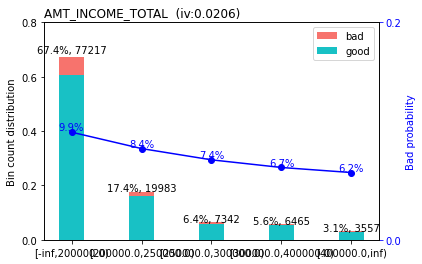

In [ ]:
#adjust the bins
breaks_adj = {'AMT_INCOME_TOTAL' : [200000,250000, 300000,400000]}
# bins5 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj, positive="bad|0")
bins5 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj)
sc.woebin_plot(bins5['AMT_INCOME_TOTAL'])

# Adjust days employed

In [ ]:
df["DAYS_EMPLOYED"].value_counts().sort_index()

-9136        1
-9123        1
-9112        1
-9100        1
-9039        1
          ... 
-8           1
-5           1
-4           2
 0           2
 365243    697
Name: DAYS_EMPLOYED, Length: 7976, dtype: int64

[INFO] creating woe binning ...


{'DAYS_EMPLOYED': <Figure size 432x288 with 2 Axes>}

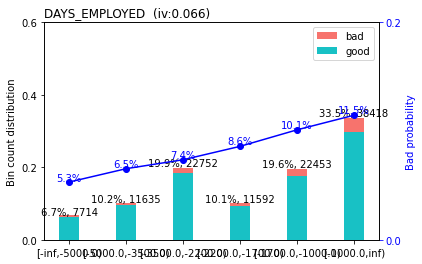

In [ ]:
#adjust the bins
breaks_adj = {'DAYS_EMPLOYED' : [-5000,-3500, -2200, -1700, -1000]}
# bins6 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj, positive="bad|0")
bins6 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj)
sc.woebin_plot(bins6['DAYS_EMPLOYED'])

# Adjust amt annuity

In [ ]:
df["AMT_ANNUITY"].value_counts().sort_index()

0.0          5
2187.0       1
2205.0       1
2754.0       1
2781.0       2
            ..
213291.0     3
215500.5     1
220297.5     1
225000.0    10
258025.5     1
Name: AMT_ANNUITY, Length: 10881, dtype: int64

[INFO] creating woe binning ...


{'AMT_ANNUITY': <Figure size 432x288 with 2 Axes>}

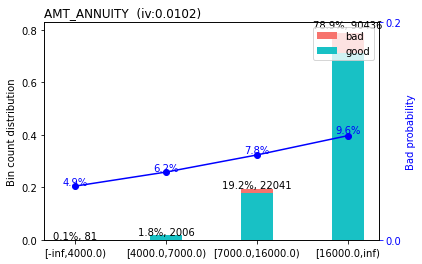

In [ ]:
#adjust the bins
breaks_adj = {'AMT_ANNUITY' : [4000, 7000, 16000]}
# bins7 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj, positive="bad|0")
bins7 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj)
sc.woebin_plot(bins7['AMT_ANNUITY'])

# Adjust ext source 2

In [ ]:
df["EXT_SOURCE_2"].value_counts().sort_index()

0.000001    1
0.000006    1
0.000010    1
0.000017    1
0.000017    1
           ..
0.816462    1
0.816504    1
0.817873    1
0.821714    1
0.855000    9
Name: EXT_SOURCE_2, Length: 72580, dtype: int64

[INFO] creating woe binning ...


{'EXT_SOURCE_2': <Figure size 432x288 with 2 Axes>}

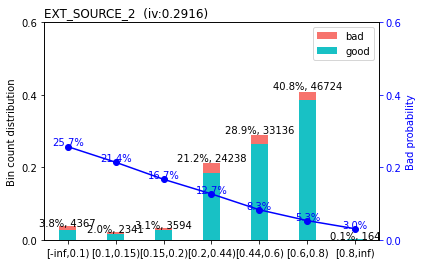

In [ ]:
#adjust the bins
breaks_adj = {'EXT_SOURCE_2' : [0.1,0.15,0.20,0.44,0.6,0.80]}
# bins8 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj, positive="bad|0")
bins8 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj)
sc.woebin_plot(bins8['EXT_SOURCE_2'])

# Adjusting amt_credit

In [ ]:
df["AMT_CREDIT"].value_counts().sort_index()

45000.0      79
47970.0      60
48519.0       1
49455.0       4
49500.0      15
             ..
3312162.0     1
3375000.0     3
3600000.0     2
3860019.0     1
4050000.0     5
Name: AMT_CREDIT, Length: 4124, dtype: int64

[INFO] creating woe binning ...


{'AMT_CREDIT': <Figure size 432x288 with 2 Axes>}

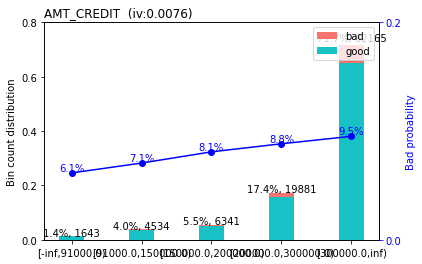

In [ ]:
#adjust the bins
breaks_adj = {'AMT_CREDIT' : [91000,150000,200000,300000]}
# bins9 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj, positive="bad|0")
bins9 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj)
sc.woebin_plot(bins9['AMT_CREDIT'])

In [ ]:
df["CNT_FAM_MEMBERS"].value_counts().sort_index()

1.0     15571
2.0     45360
3.0     32181
4.0     18466
5.0      2639
6.0       270
7.0        54
8.0        11
9.0         2
10.0        3
11.0        1
12.0        1
14.0        2
16.0        1
20.0        2
Name: CNT_FAM_MEMBERS, dtype: int64

[INFO] creating woe binning ...


{'CNT_FAM_MEMBERS': <Figure size 432x288 with 2 Axes>}

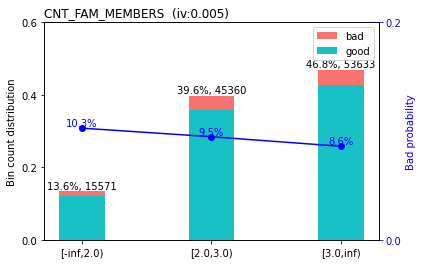

In [ ]:
#adjust the bins
breaks_adj = {'CNT_FAM_MEMBERS' : [1,2,3]}
# bins10 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj, positive="bad|0")
bins10 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj)
sc.woebin_plot(bins10['CNT_FAM_MEMBERS'])

In [ ]:
df["NAME_FAMILY_STATUS"].value_counts().sort_index()

0    12185
1    78550
2     6580
3    16340
4      909
Name: NAME_FAMILY_STATUS, dtype: int64

[INFO] creating woe binning ...


{'NAME_FAMILY_STATUS': <Figure size 432x288 with 2 Axes>}

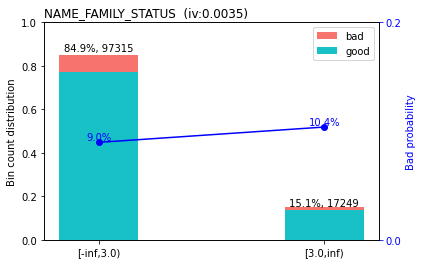

In [ ]:
#adjust the bins
breaks_adj = {'NAME_FAMILY_STATUS' : [0,3]}
# bins11 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj, positive="bad|0")
bins11 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj)
sc.woebin_plot(bins11['NAME_FAMILY_STATUS'])

In [ ]:
df["age"].value_counts().sort_index()

27.0    7061
28.0    6700
29.0    6491
30.0    6636
31.0    7274
32.0    6833
33.0    6789
34.0    6675
35.0    6824
36.0    7512
37.0    7779
38.0    7860
39.0    7682
40.0    7677
41.0    7500
42.0    7271
Name: age, dtype: int64

[INFO] creating woe binning ...


{'age': <Figure size 432x288 with 2 Axes>}

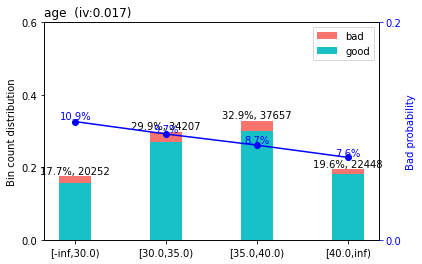

In [ ]:
#adjust the bins
breaks_adj = {'age' : [27, 30,35, 40]}
# bins12 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj, positive="bad|0")
bins12 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj)
sc.woebin_plot(bins12['age'])

In [ ]:
# #adjust the bins
# breaks_adj = {'age' : [27, 34, 40]}
# bins12 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj, positive="bad|0")
# # bins12 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj)
# sc.woebin_plot(bins12['age'])

In [ ]:
df["NAME_CONTRACT_TYPE"].value_counts().sort_index()

0    103860
1     10704
Name: NAME_CONTRACT_TYPE, dtype: int64

[INFO] creating woe binning ...


{'NAME_CONTRACT_TYPE': <Figure size 432x288 with 2 Axes>}

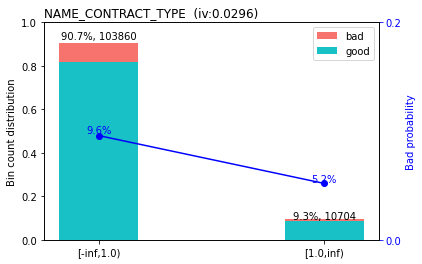

In [ ]:
#adjust the bins
breaks_adj = {'NAME_CONTRACT_TYPE' : [0,1]}
# bins13 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj, positive="bad|0")
bins13 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj)
sc.woebin_plot(bins13['NAME_CONTRACT_TYPE'])

In [ ]:
df["DEF_60_CNT_SOCIAL_CIRCLE"].value_counts().sort_index()

0.0     104874
1.0       8268
2.0       1154
3.0        222
4.0         39
5.0          5
6.0          1
24.0         1
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: int64

[INFO] creating woe binning ...


{'DEF_60_CNT_SOCIAL_CIRCLE': <Figure size 432x288 with 2 Axes>}

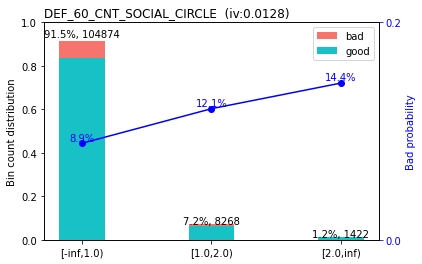

In [ ]:
#adjust the bins
breaks_adj = {'DEF_60_CNT_SOCIAL_CIRCLE' : [0,1,2]}
# bins14 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj, positive="bad|0")
bins14 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj)
sc.woebin_plot(bins14['DEF_60_CNT_SOCIAL_CIRCLE'])

In [ ]:
# #adjust the bins
# breaks_adj = {'DEF_60_CNT_SOCIAL_CIRCLE' : [0,1]}
# bins14 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj, positive="bad|0")
# # bins14 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj)
# sc.woebin_plot(bins14['DEF_60_CNT_SOCIAL_CIRCLE'])

In [ ]:
df["FLAG_OWN_CAR"].value_counts().sort_index()

0    67448
1    47116
Name: FLAG_OWN_CAR, dtype: int64

[INFO] creating woe binning ...


{'FLAG_OWN_CAR': <Figure size 432x288 with 2 Axes>}

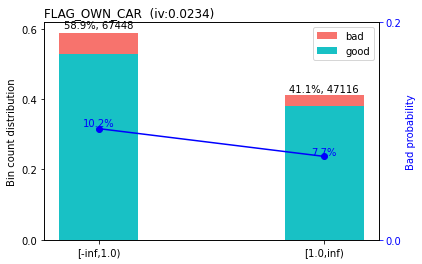

In [ ]:
#adjust the bins
breaks_adj = {'FLAG_OWN_CAR' : [0,1]}
# bins15 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj, positive="bad|0")
bins15 = sc.woebin(df, y='STATUS',breaks_list=breaks_adj)
sc.woebin_plot(bins15['FLAG_OWN_CAR'])

In [112]:
breaks_adj = {
       'OCCUPATION_TYPE' : [1,  6, 9, 11 ,19],
       'NAME_INCOME_TYPE' : [3,5],
        'NAME_EDUCATION_TYPE' : [0,2,3],
        'AMT_INCOME_TOTAL' : [200000,250000, 300000,400000],
        'DAYS_EMPLOYED' : [-5000,-3500, -2200, -1700, -1000],
        'AMT_ANNUITY' : [4000, 7000, 16000],
        'EXT_SOURCE_2' : [0.1,0.15,0.20,0.44,0.6,0.80],
        'AMT_CREDIT' : [91000,150000,200000,300000],
        'CNT_FAM_MEMBERS' : [1,2,3],
        'NAME_FAMILY_STATUS' : [0,3],
        'age' : [27, 30,35, 40],
        'DEF_60_CNT_SOCIAL_CIRCLE' : [0,1,2],
        'FLAG_OWN_CAR': [0,1]
    }
bins_final = sc.woebin(df, y='STATUS',breaks_list=breaks_adj)
# bins_final = sc.woebin(df, y='STATUS',breaks_list=breaks_adj, positive="bad|0")

[INFO] creating woe binning ...


In [113]:
# sample code
train, test = sc.split_df(df, 'STATUS', ratio=0.8).values()
print(train.shape)
print(test.shape)

(91651, 16)
(22913, 16)


In [114]:
print('Proportion of positive cases in train set:', train['STATUS'].mean())
print('Proportion of positive cases in test set:', test['STATUS'].mean())

Proportion of positive cases in train set: 0.09175022640233058
Proportion of positive cases in test set: 0.09173831449395539


In [115]:
# train_woe = sc.woebin_ply(train, bins_final, positive="bad|0")
# test_woe = sc.woebin_ply(test, bins_final, positive="bad|0")
train_woe = sc.woebin_ply(train, bins_final)
test_woe = sc.woebin_ply(test, bins_final)

[INFO] converting into woe values ...
[INFO] converting into woe values ...


In [116]:
y_train = train_woe.loc[:,'STATUS']
X_train = train_woe.loc[:,train_woe.columns != 'STATUS']
y_test = test_woe.loc[:,'STATUS']
X_test = test_woe.loc[:,test_woe.columns != 'STATUS']

In [117]:
#create a logistic regression model object
lr = LogisticRegression(class_weight='balanced', random_state=7)
lr.fit(X_train, y_train)
print(lr.coef_)
print(lr.intercept_)

[[0.88008226 1.19936291 0.67811694 0.64657517 0.04404349 0.7797081
  0.88384483 0.38724303 0.84552333 0.73713267 0.51331987 0.61951754
  0.07485943 0.86319151 0.63885725]]
[-0.0034156]


1 is good
0 is default

In [118]:
accuracy = lr.score(X_test, y_test)
accuracy

0.6486710600968882

In [119]:
y_test.value_counts()

0    20811
1     2102
Name: STATUS, dtype: int64

In [120]:
# make predictions on the test set
y_pred = lr.predict(X_test)

In [121]:
# assume y_true and y_pred are the true and predicted labels, respectively
cm = confusion_matrix(y_test, y_pred, labels=[0,1])

# create a dataframe from the confusion matrix
df_cm = pd.DataFrame(cm, index=['Good', 'Default'], columns=['Predict Good', 'Predict Default'])


# print the dataframe
print(df_cm)

         Predict Good  Predict Default
Good            13557             7254
Default           796             1306


True positive (TP)
The model predicts a good customer, and the client did not default <br>
False positive (FP)
The model predicts a good customer, but the client defaulted<br>
True negative (TN) 
The model predicts a default, and the client defaulted<br>
False negative (FN)
The model predicts a default, but the client did not default

In [122]:
#import accuracy score from sklearn
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=[0,1]).ravel()
print(tp,fn,fp,tn)

accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp) #Given that we predict positive, how often is it really positive
recall = tp / (tp + fn) #How good at predicting positive
f1 = 2 * (precision * recall) / (precision + recall)
specificity = tn / (tn + fp) # How good at predicting negative?

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity) 
print("F1:", f1)

13557 7254 796 1306
Accuracy: 0.6486710600968882
Precision: 0.9445412108966766
Recall: 0.6514343376099179
Specificity: 0.621313035204567
F1: 0.7710726879763394


In [124]:
#import accuracy score from sklearn
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
def calculate(y_test,y_pred):
    tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=[0,1]).ravel()
    return tn/(tn+fp)

In [125]:
numbers = []
for i in range(1, 200):
    numbers.append(i / 100)

best_c = 1
spec = 0.6189343482397717

In [126]:
for i in numbers:
    lr = LogisticRegression(random_state=7,C= i, solver= 'liblinear', class_weight='balanced')
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    res = calculate(y_test,y_pred)
    if res > spec:
        best_c=i
        spec=res

In [127]:
print(best_c)

0.08


In [128]:
#create a logistic regression model object
lr = LogisticRegression(C=1,class_weight='balanced', solver='liblinear', random_state=7)
lr.fit(X_train, y_train)
print(lr.coef_)
print(lr.intercept_)

[[0.87969612 1.20083071 0.67620545 0.64659311 0.04381229 0.77964218
  0.88391407 0.38580143 0.8454899  0.73742698 0.51328868 0.61929479
  0.07582788 0.86360272 0.63886746]]
[-0.00341884]


In [129]:
# assume y_true and y_pred are the true and predicted labels, respectively
cm = confusion_matrix(y_test, y_pred, labels=[0,1])

# create a dataframe from the confusion matrix
df_cm = pd.DataFrame(cm, index=['Good', 'Default'], columns=['Predict Good', 'Predict Default'])


# print the dataframe
print(df_cm)

         Predict Good  Predict Default
Good            13551             7260
Default           794             1308


In [130]:
#import accuracy score from sklearn
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=[0,1]).ravel()
print(tp,fn,fp,tn)

accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp) #Given that we predict positive, how often is it really positive
recall = tp / (tp + fn) #How good at predicting positive
f1 = 2 * (precision * recall) / (precision + recall)
specificity = tn / (tn + fp) # How good at predicting negative?

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity) 
print("F1:", f1)

13551 7260 794 1308
Accuracy: 0.648496486710601
Precision: 0.9446497037295225
Recall: 0.6511460285425976
Specificity: 0.6222645099904852
F1: 0.7709068153373535


In [131]:
X_train.columns

Index(['CNT_FAM_MEMBERS_woe', 'AMT_CREDIT_woe', 'FLAG_OWN_REALTY_woe',
       'NAME_EDUCATION_TYPE_woe', 'AMT_INCOME_TOTAL_woe', 'FLAG_OWN_CAR_woe',
       'EXT_SOURCE_2_woe', 'AMT_ANNUITY_woe', 'DAYS_EMPLOYED_woe',
       'NAME_CONTRACT_TYPE_woe', 'OCCUPATION_TYPE_woe', 'NAME_INCOME_TYPE_woe',
       'NAME_FAMILY_STATUS_woe', 'DEF_60_CNT_SOCIAL_CIRCLE_woe', 'age_woe'],
      dtype='object')

In [132]:
#generate a card from the model and bins. The scores will be based on probability of default from the model
card = sc.scorecard(bins_final, lr, X_train.columns, points0 = 600, odds0 = 1/20, pdo = 20,
      basepoints_eq0 = True)

pprint.pprint(card)

{'AMT_ANNUITY':        variable               bin  points
36  AMT_ANNUITY     [-inf,4000.0)    42.0
37  AMT_ANNUITY   [4000.0,7000.0)    39.0
38  AMT_ANNUITY  [7000.0,16000.0)    36.0
39  AMT_ANNUITY     [16000.0,inf)    34.0,
 'AMT_CREDIT':      variable                  bin  points
3  AMT_CREDIT       [-inf,91000.0)    49.0
4  AMT_CREDIT   [91000.0,150000.0)    44.0
5  AMT_CREDIT  [150000.0,200000.0)    39.0
6  AMT_CREDIT  [200000.0,300000.0)    36.0
7  AMT_CREDIT       [300000.0,inf)    33.0,
 'AMT_INCOME_TOTAL':             variable                  bin  points
10  AMT_INCOME_TOTAL      [-inf,200000.0)    34.0
11  AMT_INCOME_TOTAL  [200000.0,250000.0)    34.0
12  AMT_INCOME_TOTAL  [250000.0,300000.0)    35.0
13  AMT_INCOME_TOTAL  [300000.0,400000.0)    35.0
14  AMT_INCOME_TOTAL       [400000.0,inf)    35.0,
 'CNT_FAM_MEMBERS':           variable         bin  points
0  CNT_FAM_MEMBERS  [-inf,2.0)    31.0
1  CNT_FAM_MEMBERS   [2.0,3.0)    33.0
2  CNT_FAM_MEMBERS   [3.0,inf)    36.0,


array([[<AxesSubplot:title={'center':'score'}>]], dtype=object)

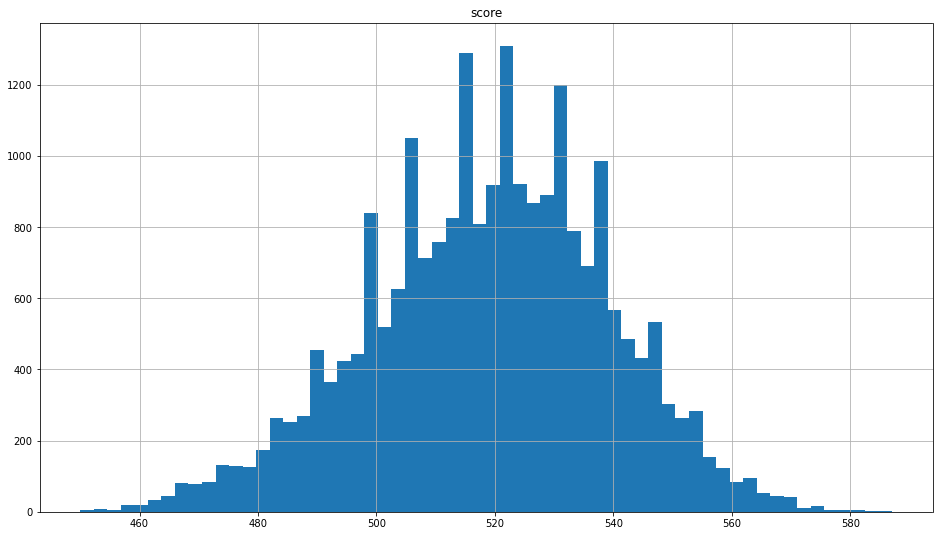

In [133]:
train_score = sc.scorecard_ply(train, card)
test_score = sc.scorecard_ply(test, card)

#distrubution of scores on test data
test_score.hist(figsize=(16,9),bins=60)

In [134]:
temp_df = pd.DataFrame()

for key in card:
    if key != 'basepoints':
        temp_df = temp_df.append(card[key], ignore_index=True)
        
temp_df['bin'] = temp_df['bin'].apply(lambda x: str(x).replace('[','').replace(')',''))

for i in range(0, len(temp_df)):
    value = str(temp_df.iloc[i]['bin'])
    value_list = value.split(',')
    if str(value_list[0]) == '-inf':
        value = '<' + value_list[1]
    elif str(value_list[1]) == 'inf':        
        value = ">"+value_list[0]
    temp_df.at[i,'bin'] = value

temp_df.to_csv('scorecard.csv', index=False)

PermissionError: [Errno 13] Permission denied: 'scorecard.csv'